О наборе данных



---




Датасет взят с Kaggle (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease).
Представляет собой набор ключевых показателей сердечно-сосудистых заболеваний.
Данные были собраны на основании опроса, проведенного в США Центром по контролю и профилактике заболеваний (CDC) в 2020 году среди 400 тысяч взрослых, связанные с состоянием их здоровья.

Болезни сердца являются одной из основных причин смерти людей в США. Около половины всех американцев (47%) имеют по крайней мере 1 из 3 ключевых факторов риска сердечно-сосудистых заболеваний: высокое кровяное давление, высокий уровень холестерина и курение. Другие ключевые индикаторы включают диабет, ожирение (высокий ИМТ), недостаточную физическую активность или употребление слишком большого количества алкоголя. К сожалению, эти тенденции во многом схожи во всех странах, поэтому датасет актуален и для российской действительности.
Выявление и предотвращение факторов, оказывающих наибольшее влияние на развитие сердечно-сосудистых заболеваний, очень важная задача для современного здравоохранения.
Применим методы машинного обучения для обнаружения «закономерностей» в данных для предсказания состояние пациентов.
Нашим целевым показателем будет HeartDisease:Yes/No - наличие или отсутствие заболевания сердца.


## EDA

Импортируем необходимые библиотеки для начала работы. Прочитаем данные, посмотрим на них.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_2020_cleaned.csv')

In [ ]:
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

*HeartDisease* наша целевая переменная, мы будем предсказывать наличие сердечной недостаточности у пациентов. В датасете 319795 экземпляров и 17 признаков, описывающих их.

Наши признаки:
1. ВMI- индекс массы тела
2. Smoking - курение
3. AlcoholDrinking - употребление алкоголя
4. Stroke - инсульт
5. PhysicalHealth -физическое состояние(количество отрицательных дней за последний месяц)
6. MentalHealth - ментальное здоровье(количество отрицательных дней за последний месяц)
7. DiffWalking - затруднения при передвижениях
8. Sex - пол
9. AgeCategory - возрастная группа
10. Race - раса
11. Diabetic - диабет
12. PhysicalActivity - физическая активность
13. GenHealth - общее состояние
14. SleepTime - среднее количество сна в сутки
15. Asthma - астма
16. KidneyDisease - почечная недостаточность
17. SkinCancer - рак кожи


Большая часть признаков категориальная, в дальнейшем мы их переведем в числовое представление.
Для начала изучим данные. Проверим пропуски и дубликаты.


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

18078

Пропусков в данных нет, дубликаты есть. Удалим повторяющиеся данные.

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(301717, 18)

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


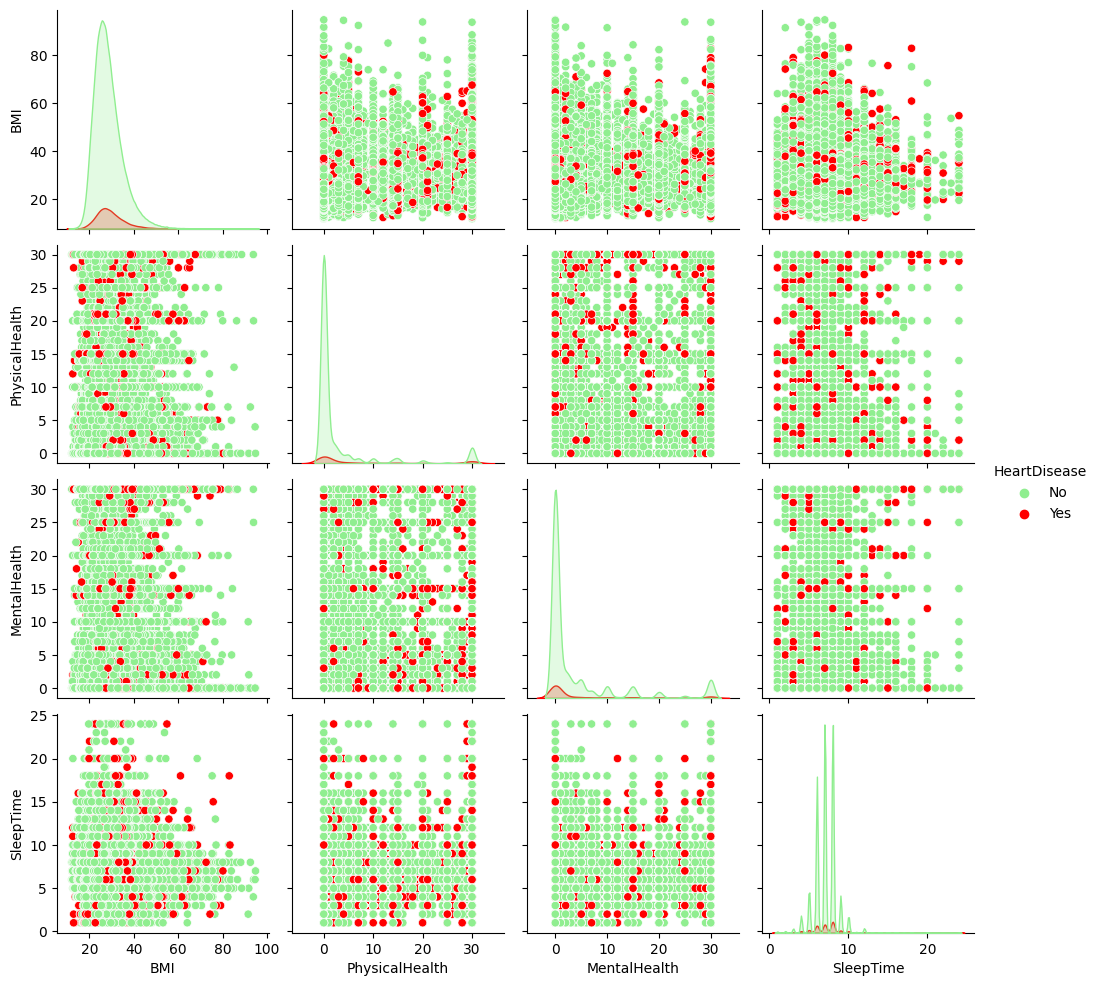

In [ ]:
sns.pairplot(df, hue= 'HeartDisease', palette = ['Lightgreen', 'red'])

На графиках по диагонали видно, что нет особой связи между ментальным, физическим здоровьем с заболеваниями сердца, а вот индекс массы тела демонстрирует прямую корреляцию. Поближе расммотрим распространенность заболеваний сердца среди мужчин и женщин, курящих/некурящих.

<Axes: xlabel='Smoking', ylabel='count'>

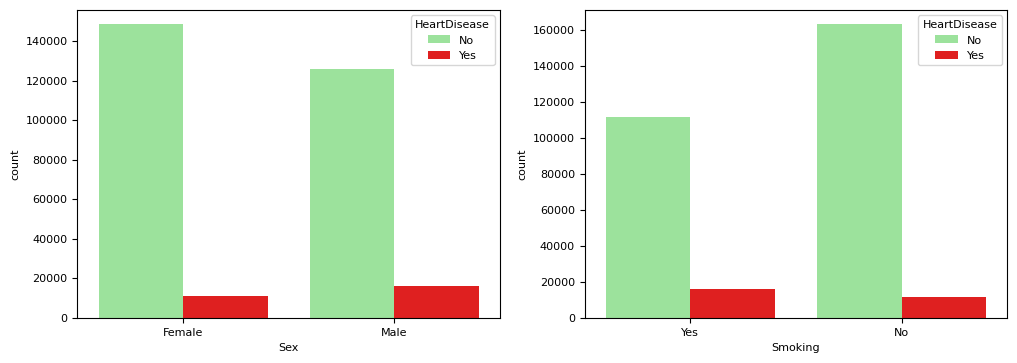

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Sex', hue='HeartDisease', data=df, palette=['lightgreen', 'red'], ax=axes[0])
sns.countplot(x='Smoking', hue='HeartDisease', data=df, palette=['lightgreen', 'red'], ax=axes[1])

На диаграммах видно, что среди мужчин заболевания сердца распространены больше, чем среди женщин. Курение вызывает риск развития сердечных заболеваний.

<Axes: xlabel='count', ylabel='HeartDisease'>

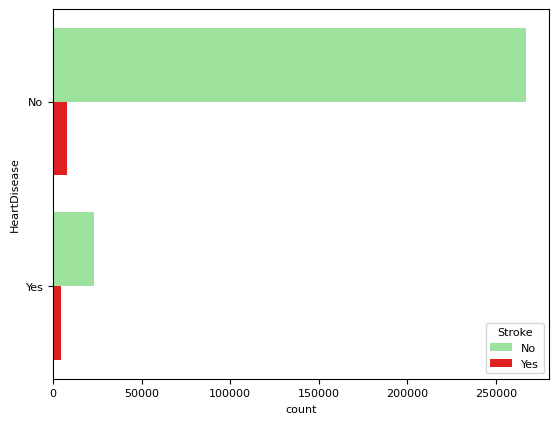

In [ ]:
sns.countplot(df, y='HeartDisease', hue='Stroke', palette=['lightgreen', 'red'])

Как ни странно, но между инсультом и сердечным заболеванием зависимости не видно на диаграмме.

<Axes: xlabel='Percentage', ylabel='SleepTime'>

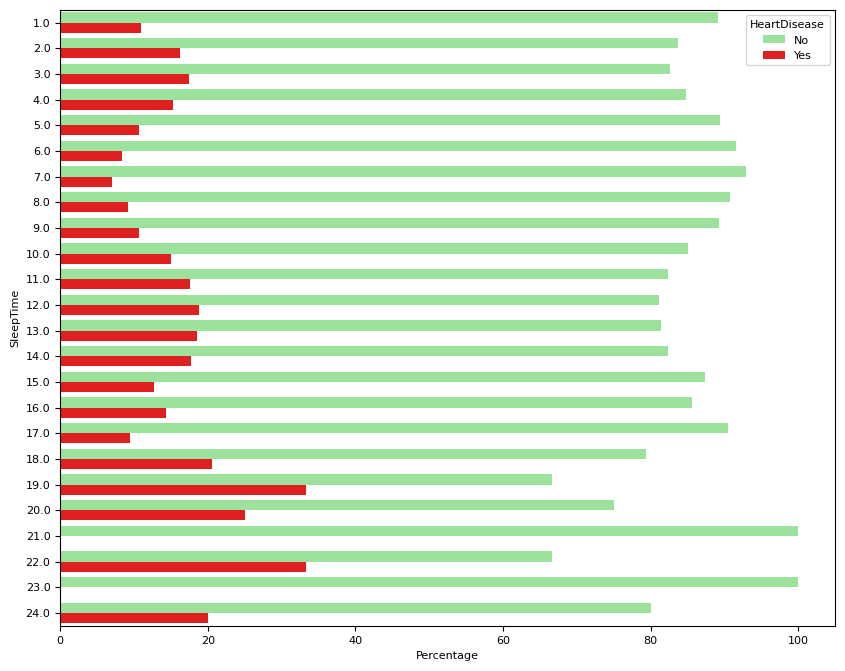

In [ ]:
sleep_hd = df.groupby("SleepTime")["HeartDisease"].value_counts(normalize=True).mul(100).rename("Percentage").reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data=sleep_hd, x="Percentage", y="SleepTime", hue="HeartDisease", orient='h', palette=['lightgreen', 'red'])

На графике видно, что растет число заболеваний у людей, у которых очень высокая продолжительность сна.

([<matplotlib.patches.Wedge at 0x7e5afcad0f10>,
 [Text(-1.0559821726450649, 0.3080611157803087, 'Здоров'),
  Text(1.1519805362440165, -0.3360667256884387, 'Болеет')],
 [Text(-0.5759902759882171, 0.16803333588016836, '90.96%'),
  Text(0.671988646142343, -0.1960389233182559, '9.04%')])

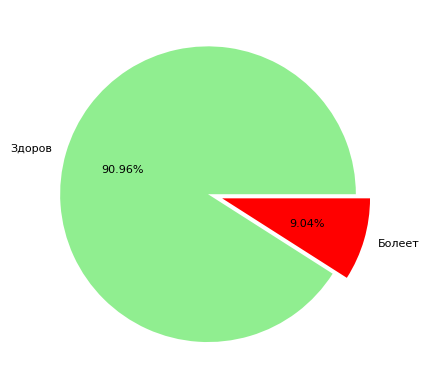

In [ ]:
plt.pie(data=df, x= df['HeartDisease'].value_counts(),  labels=['Здоров', 'Болеет'], explode=(0, 0.1), autopct = "%.2f%%", colors = ['lightgreen', 'red'])

Целевой показатель не сбалансирован. Доля здоровых людей в выборке почти в 10 раз превышает людей с сердечно-сосудистыми заболеваниями.
Посмотрим есть ли выбросы в данных и рассмотрим распределение признаков.

<Axes: ylabel='SleepTime'>

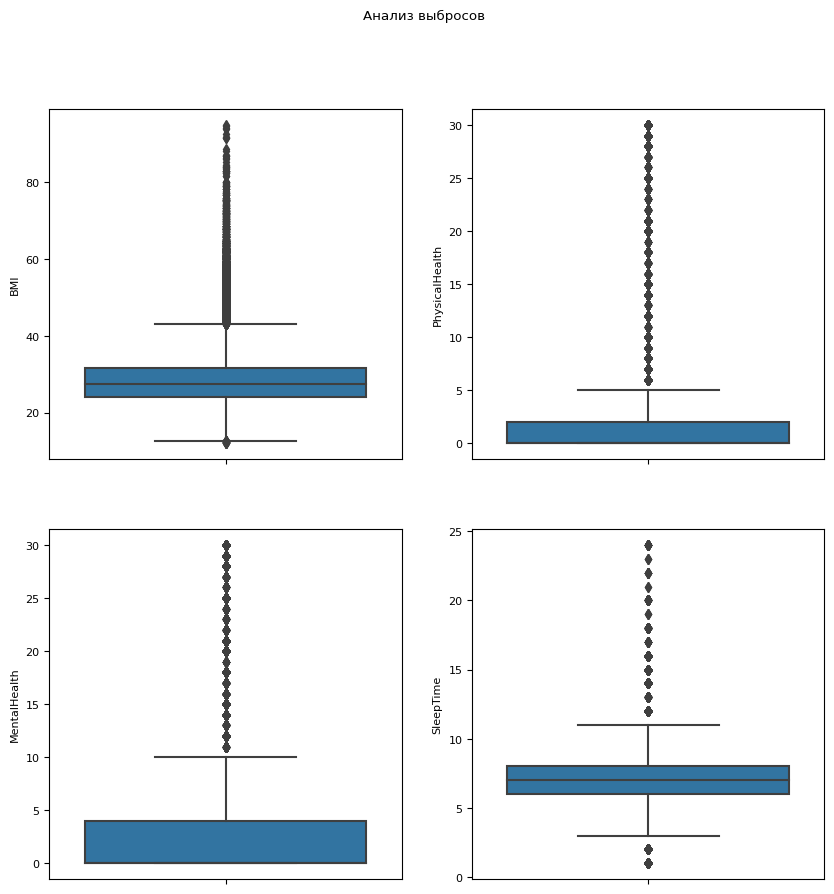

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Анализ выбросов')
sns.boxplot(y=df['BMI'],ax=ax[0,0])
sns.boxplot(y=df['PhysicalHealth'],ax=ax[0,1])
sns.boxplot(y=df['MentalHealth'],ax=ax[1,0])
sns.boxplot(y=df['SleepTime'],ax=ax[1,1])

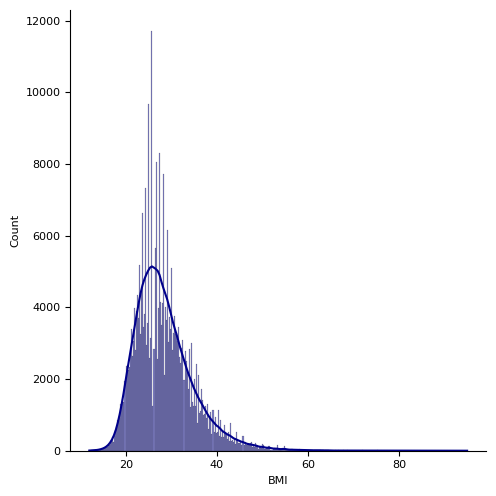

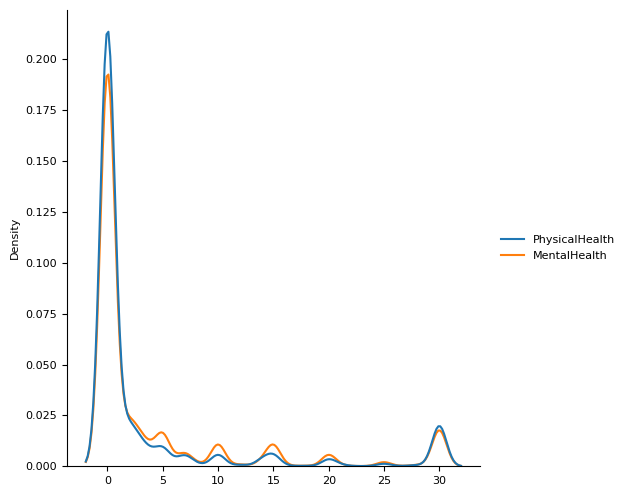

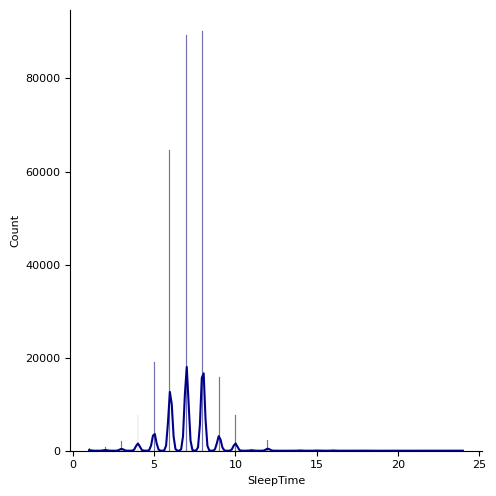

In [ ]:
fig.suptitle('Анализ распределений')
sns.displot(df['BMI'],color = 'darkblue', kind='hist', kde=True)
sns.displot([df['PhysicalHealth'], df['MentalHealth']], color = 'red', kind='kde')
sns.displot(df['SleepTime'], color = 'darkblue', kind='hist', kde=True)

In [ ]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3-Q1

Учитывая специфику нашей задачи и тот факт, что данные распределены близко к нормальному, оставим аномальные значения в выборке. Не будем удалять выбросы, которые были выявлены при построении "ящиков с усами".


In [ ]:
#df1 = df[~((df < (Q1-1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]

Импортируем класс для кодирования категориальных признаков в числовые. Используем разные способы, поскольку в нашем датасете есть как порядковые, так и номинальные признаки.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
Cols =['Smoking','AlcoholDrinking','Stroke','DiffWalking','AgeCategory', 'PhysicalActivity', 'Asthma','KidneyDisease','SkinCancer' ]

In [ ]:
df[Cols] = df[Cols].apply(le.fit_transform)

In [ ]:
df.corr()

<ipython-input-102-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
BMI,1.000000,0.015890,-0.043463,0.016314,0.103813,0.056724,0.177388,-0.006069,-0.144441,-0.048653,0.087563,0.047796,-0.038060
Smoking,0.015890,1.000000,0.109183,0.058868,0.110270,0.078364,0.115789,0.128259,-0.089864,-0.027874,0.017545,0.031890,0.030438
AlcoholDrinking,-0.043463,0.109183,1.000000,-0.022707,-0.023255,0.045421,-0.041135,-0.060761,0.024408,-0.003172,-0.007114,-0.031166,-0.008739
Stroke,0.016314,0.058868,-0.022707,1.000000,0.132966,0.041324,0.170664,0.141537,-0.074898,0.013697,0.034942,0.089109,0.046039
PhysicalHealth,0.103813,0.110270,-0.023255,0.132966,1.000000,0.279657,0.422935,0.114623,-0.224121,-0.058406,0.110083,0.138219,0.036753
MentalHealth,0.056724,0.078364,0.045421,0.041324,0.279657,1.000000,0.142964,-0.158608,-0.084274,-0.117078,0.105266,0.032105,-0.040214
DiffWalking,0.177388,0.115789,-0.041135,0.170664,0.422935,0.142964,1.000000,0.250407,-0.271748,-0.019155,0.095826,0.149471,0.060596
AgeCategory,-0.006069,0.128259,-0.060761,0.141537,0.114623,-0.158608,0.250407,1.000000,-0.125294,0.105025,-0.058823,0.126541,0.267930
PhysicalActivity,-0.144441,-0.089864,0.024408,-0.074898,-0.224121,-0.084274,-0.271748,-0.125294,1.000000,-0.000157,-0.032140,-0.077304,0.004785
SleepTime,-0.048653,-0.027874,-0.003172,0.013697,-0.058406,-0.117078,-0.019155,0.105025,-0.000157,1.000000,-0.045368,0.008028,0.043241


<ipython-input-103-f3e8cc9b5e8a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
<ipython-input-103-f3e8cc9b5e8a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, cmap='coolwarm', annot=True)


<Axes: >

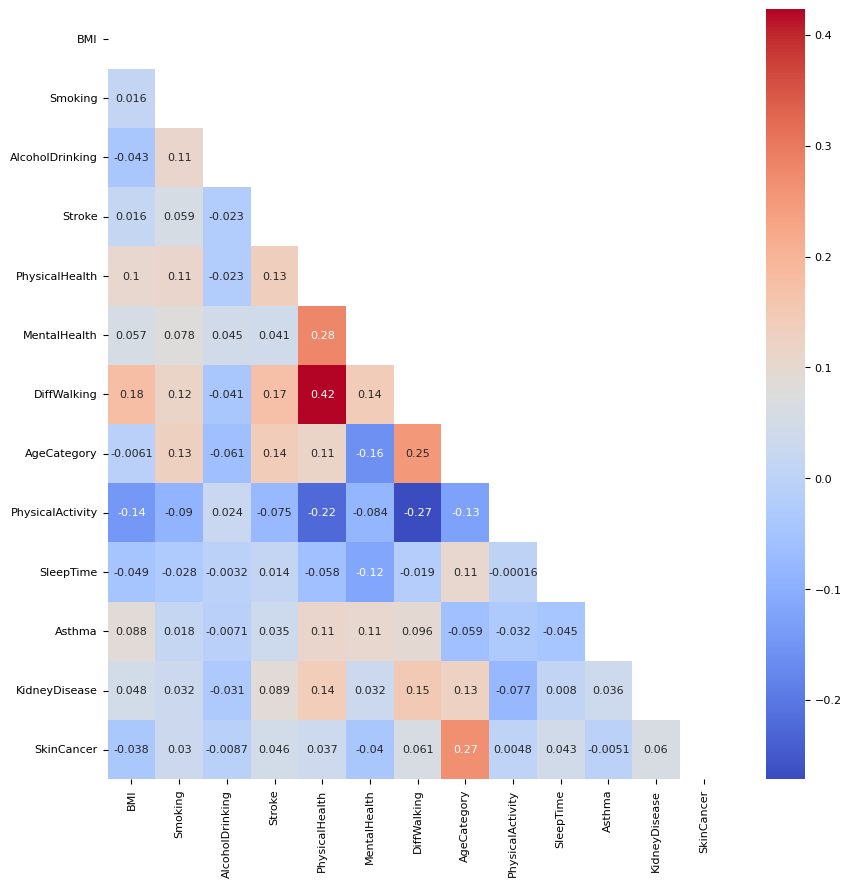

In [ ]:
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.rcParams['font.size'] = 8
sns.heatmap(df.corr(), mask=mask, cmap='coolwarm', annot=True)

Сильной корреляции между признаками не обнаружено.


In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Race', 'GenHealth', 'Diabetic'])

Масштабировать и/или стандартизировать признаки нам не нужно, поскольку все алгоритмы будут на основе деревьев.

Загрузим модуль для разделения данных на обучающую и тестовую выборки и приступим к обучению моделей.

## Baseline - модель

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data, unseen_data = train_test_split(df, train_size=0.95, random_state=42)

In [ ]:
X = data.iloc[:,1:]
y = data.iloc[:, 0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(class_weight = 'balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
y_pred = clf.predict(X_test)

Загрузим модули для оценки качества моделей.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

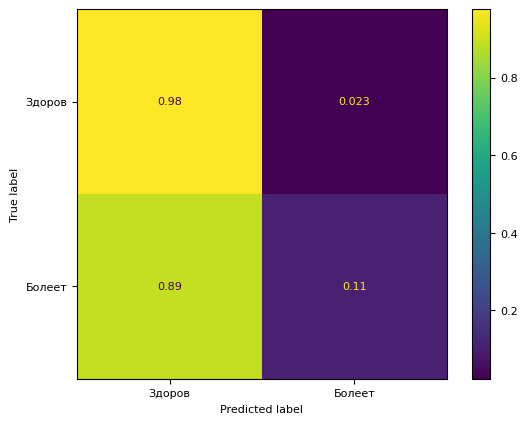

In [ ]:
confusion_matrix(y_test, y_pred)
mat=confusion_matrix(y_test, y_pred, normalize='true')
disprf = ConfusionMatrixDisplay(mat, display_labels=['Здоров','Болеет'])
disprf.plot()

In [ ]:
confusion_matrix(y_test, y_pred)

array([[76473,  1831],
       [ 6834,   852]])

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Здоров', 'Болеет'])
print(report)

              precision    recall  f1-score   support

      Здоров       0.92      0.98      0.95     78304
      Болеет       0.32      0.11      0.16      7686

    accuracy                           0.90     85990
   macro avg       0.62      0.54      0.56     85990
weighted avg       0.86      0.90      0.88     85990



Применительно к нашей задаче главной метрикой качества будет Recall, поскольку нам важно выявить как можно больше больных людей. Лучше пусть здоровый человек лишний раз обследуется, чем мы пропустим больного.

Посмотрим на информативность признаков, попробуем переобучить модель на очищенных признаках.

In [ ]:
importances = clf.feature_importances_

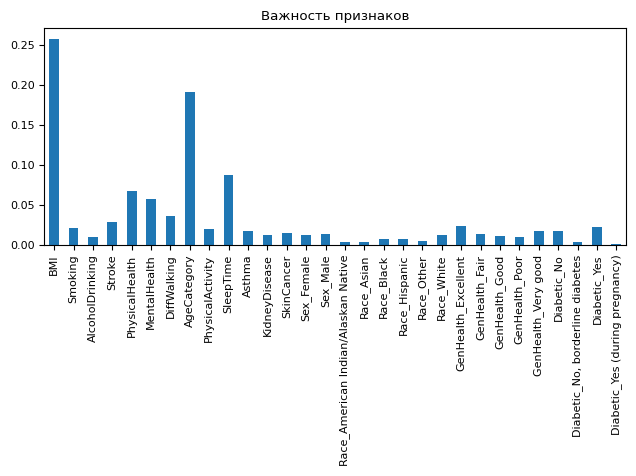

In [ ]:
forest_importances = pd.Series(importances, index=X.columns.values)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Важность признаков")
fig.tight_layout()

Самый большой вес модель дала показателю ИМТ, одной из причин является большое количество значений у этого признака.
Попробуем удалить неинформативные признаки и переобучим модель.



In [ ]:
df1= df.drop(columns=['AlcoholDrinking', 'KidneyDisease', 'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White'])

In [ ]:
X_dropped = df1.iloc[:,1:]
y_dropped = df1.iloc[:, 0]
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y_dropped, test_size=0.3, random_state=42, shuffle=True)


In [ ]:
clf.fit(X_train_dropped, y_train_dropped)

RandomForestClassifier(class_weight='balanced')

In [ ]:
y_pred_dropped = clf.predict(X_test_dropped)

In [ ]:
report = classification_report(y_test_dropped, y_pred_dropped, target_names=['Здоров', 'Болеет'])
print(report)

              precision    recall  f1-score   support

      Здоров       0.92      0.97      0.94     82383
      Болеет       0.29      0.12      0.17      8133

    accuracy                           0.89     90516
   macro avg       0.60      0.54      0.55     90516
weighted avg       0.86      0.89      0.87     90516



Результат изменился совсем незначительно. Качество предсказания модели очень низкое. Скорее всего это результат сильного дисбаланса целевых классов. Попробуем поработать с дисбалансом.

In [ ]:
#пробовала SMOTE метод, но качество было хуже
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler()

In [ ]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
clf.fit(X_resampled, y_resampled)
y_pred_r = clf.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred_r, target_names=['Здоров', 'Болеет'])
print(report)

              precision    recall  f1-score   support

      Здоров       0.93      0.95      0.94     78304
      Болеет       0.30      0.22      0.26      7686

    accuracy                           0.88     85990
   macro avg       0.61      0.59      0.60     85990
weighted avg       0.87      0.88      0.88     85990



In [ ]:
report = classification_report(unseen_data['HeartDisease'], clf.predict(unseen_data.drop('HeartDisease', axis=1)), target_names=['Здоров', 'Болеет'])
print(report)

              precision    recall  f1-score   support

      Здоров       0.93      0.95      0.94     13748
      Болеет       0.30      0.22      0.25      1338

    accuracy                           0.89     15086
   macro avg       0.61      0.58      0.60     15086
weighted avg       0.87      0.89      0.88     15086



Генерация дополнительных экземпляров миноритарного класса повысило качество работы модели. Возьмем данную модель за бейзлайн.
Обучим другие модели и сравним результаты с базовой.

## Modelling


> SGDClassifier


> GradientBoostingClassifier с оптимизацией гиперпараметров c помощью Optuna


> CatBoost







In [ ]:
from sklearn.linear_model import SGDClassifier
s_clf = SGDClassifier()

In [ ]:
s_clf.fit(X_resampled, y_resampled)
y_pred_s = s_clf.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred_s, target_names=['Здоров', 'Болеет'])
print(report)

              precision    recall  f1-score   support

      Здоров       0.98      0.70      0.81     78304
      Болеет       0.21      0.82      0.33      7686

    accuracy                           0.71     85990
   macro avg       0.59      0.76      0.57     85990
weighted avg       0.91      0.71      0.77     85990



In [ ]:
report = classification_report(unseen_data['HeartDisease'], s_clf.predict(unseen_data.drop('HeartDisease', axis=1)), target_names=['Здоров', 'Болеет'])
print(report)

              precision    recall  f1-score   support

      Здоров       0.97      0.69      0.81     13748
      Болеет       0.20      0.80      0.32      1338

    accuracy                           0.70     15086
   macro avg       0.59      0.75      0.57     15086
weighted avg       0.90      0.70      0.77     15086



Градиентный спуск хорошо повысил полноту предсказания моделью больных пациентов, но резко упал показатель точности. Попробуем другие модели, основанные на градиентном подходе. Найдем оптимальные гиперпараметры с помощью платформы Optuna.

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.9 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import recall_score

In [ ]:
def objective(trial):

    params = {
      "n_estimators": trial.suggest_int("n_estimators", 10, 300, step = 40),
      "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3, log = True),
      "max_depth": trial.suggest_int("max_depth", 3, 9),
      "subsample": trial.suggest_float("subsample", 0.5, 0.9, step = 0.1),
      "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"]),
      "random_state": 42,
    }

    optuna_model = GradientBoostingClassifier(**params)
    optuna_model.fit(X_resampled, y_resampled)

    y_pred = optuna_model.predict(X_test)

    score = recall_score(y_test, y_pred, pos_label="No")
    return score


In [ ]:
study = optuna.create_study(direction='maximize')

[I 2023-09-27 11:19:40,104] A new study created in memory with name: no-name-46702248-598a-4751-9ab8-ca1b4af74f05


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
study.optimize(objective, n_trials=10)

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [10, 300] and step=40, but the range is not divisible by `step`. It will be replaced by [10, 290].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

In [ ]:
print(study.best_trial)

FrozenTrial(number=1, state=TrialState.COMPLETE, values=[0.7472798324478954], datetime_start=datetime.datetime(2023, 9, 27, 11, 22, 12, 207840), datetime_complete=datetime.datetime(2023, 9, 27, 11, 22, 49, 636280), params={'n_estimators': 90, 'learning_rate': 0.151171207403923, 'max_depth': 8, 'subsample': 0.5, 'max_features': 'sqrt'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=290, log=False, low=10, step=40), 'learning_rate': FloatDistribution(high=0.3, log=True, low=0.0001, step=None), 'max_depth': IntDistribution(high=9, log=False, low=3, step=1), 'subsample': FloatDistribution(high=0.9, log=False, low=0.5, step=0.1), 'max_features': CategoricalDistribution(choices=('auto', 'sqrt', 'log2'))}, trial_id=1, value=None)


In [ ]:
print(study.best_params)

{'n_estimators': 90, 'learning_rate': 0.151171207403923, 'max_depth': 8, 'subsample': 0.5, 'max_features': 'sqrt'}


In [ ]:
params = study.best_params

In [ ]:
model = GradientBoostingClassifier(**params)
model.fit(X_resampled, y_resampled)

GradientBoostingClassifier(learning_rate=0.151171207403923, max_depth=8,
                           max_features='sqrt', n_estimators=90, subsample=0.5)

In [ ]:
print(classification_report(y_test, model.predict(X_test), target_names=['Здоров', 'Болеет']))

              precision    recall  f1-score   support

      Здоров       0.97      0.75      0.84     78304
      Болеет       0.23      0.75      0.35      7686

    accuracy                           0.75     85990
   macro avg       0.60      0.75      0.59     85990
weighted avg       0.90      0.75      0.80     85990



In [ ]:
report = classification_report(unseen_data['HeartDisease'], model.predict(unseen_data.drop('HeartDisease', axis=1)), target_names=['Здоров', 'Болеет'])
print(report)

              precision    recall  f1-score   support

      Здоров       0.97      0.74      0.84     13748
      Болеет       0.22      0.75      0.34      1338

    accuracy                           0.74     15086
   macro avg       0.60      0.75      0.59     15086
weighted avg       0.90      0.74      0.80     15086



Автоматический подбор гиперпараметров с помощью Optuna дает возможность натроить модель, подобрав оптимальные настройки. Немного вырос показатель точности.

Попробуем библиотеку CatBoost, интересно построить модель с категориальными признаками.

In [ ]:
!pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
cat_model = CatBoostClassifier(iterations = 1000)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_2020_cleaned.csv')
df = df.drop_duplicates()

In [ ]:
data, unseen_data = train_test_split(df, train_size=0.95, random_state=42)

In [ ]:
X = data.drop(['HeartDisease'], axis=1)
y = le.fit_transform(data['HeartDisease'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [ ]:
#from imblearn.over_sampling import SMOTENC

In [ ]:
'''
sm = SMOTENC(random_state=42, categorical_features=[1,2,3,6,7,8,9,10,11,12,14,15,16])
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
cats = ['Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']

In [ ]:
train_data = Pool(X_res, y_res, cat_features = cats)
test_data = Pool(X_test, y_test, cat_features = cats)

In [ ]:
cat_model.fit(train_data, eval_set=test_data, early_stopping_rounds=100, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.136063
0:	learn: 0.6440117	test: 0.6404667	best: 0.6404667 (0)	total: 566ms	remaining: 9m 25s
1:	learn: 0.6084562	test: 0.6050724	best: 0.6050724 (1)	total: 861ms	remaining: 7m 9s
2:	learn: 0.5817923	test: 0.5787423	best: 0.5787423 (2)	total: 1.25s	remaining: 6m 56s
3:	learn: 0.5636311	test: 0.5600112	best: 0.5600112 (3)	total: 1.52s	remaining: 6m 19s
4:	learn: 0.5496426	test: 0.5476146	best: 0.5476146 (4)	total: 1.85s	remaining: 6m 9s
5:	learn: 0.5384549	test: 0.5378849	best: 0.5378849 (5)	total: 2.16s	remaining: 5m 58s
6:	learn: 0.5306961	test: 0.5322063	best: 0.5322063 (6)	total: 2.44s	remaining: 5m 46s
7:	learn: 0.5240631	test: 0.5271312	best: 0.5271312 (7)	total: 2.73s	remaining: 5m 38s
8:	learn: 0.5189849	test: 0.5237009	best: 0.5237009 (8)	total: 3.14s	remaining: 5m 46s
9:	learn: 0.5146293	test: 0.5202626	best: 0.5202626 (9)	total: 3.43s	remaining: 5m 39s
10:	learn: 0.5110597	test: 0.5178130	best: 0.5178130 (10)	total: 3.79s	remaining: 5m 40s
11:	learn: 0.

In [ ]:
#cat_model.set_probability_threshold(0.5)

In [ ]:
report = classification_report(y_test, cat_model.predict(X_test), target_names=['Здоров', 'Болеет'])
print(report)

              precision    recall  f1-score   support

      Здоров       0.97      0.75      0.85     78304
      Болеет       0.23      0.75      0.35      7686

    accuracy                           0.75     85990
   macro avg       0.60      0.75      0.60     85990
weighted avg       0.90      0.75      0.80     85990



In [ ]:
report = classification_report(le.fit_transform(unseen_data['HeartDisease']), cat_model.predict(unseen_data.drop('HeartDisease', axis=1)), target_names=['Здоров', 'Болеет'])
print(report)

              precision    recall  f1-score   support

      Здоров       0.97      0.75      0.85     13748
      Болеет       0.22      0.74      0.34      1338

    accuracy                           0.75     15086
   macro avg       0.60      0.74      0.59     15086
weighted avg       0.90      0.75      0.80     15086



Качество модели почти аналогично Градиентному бустингу с гиперпараметрами, подобранными с помощью специализированной программы Optuna. Впечатлает, что такие же метрики библиотека обеспечила с настройками по умолчанию и с самостоятельным преобразованием категориальных признаков и за не очень большое количество итераций.

## AutoGluon

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 6.3 MB/s eta 0:0

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_2020_cleaned.csv')
data = data.sample(frac=1)

In [ ]:
a_data, unseen_data = train_test_split(data, train_size=0.9, random_state=42)

In [ ]:
train_d, test_d = train_test_split(a_data, train_size=0.7, random_state=42)

In [ ]:
train_data = TabularDataset(train_d)
train_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
3315,No,31.57,Yes,No,No,0.0,3.0,No,Male,35-39,White,No,Yes,Very good,7.0,No,No,No
1969,No,32.28,No,No,No,0.0,0.0,Yes,Female,60-64,Black,No,Yes,Good,7.0,No,No,No
206941,No,26.63,No,No,No,0.0,0.0,No,Male,18-24,Asian,No,Yes,Very good,7.0,No,No,No
144719,No,28.19,Yes,Yes,No,0.0,15.0,No,Male,30-34,White,No,Yes,Excellent,6.0,No,No,No
291217,No,20.48,No,Yes,No,0.0,1.0,No,Female,80 or older,White,No,Yes,Good,7.0,No,No,No


In [ ]:
label = 'HeartDisease'
train_data[label].describe()

count     201470
unique         2
top           No
freq      184078
Name: HeartDisease, dtype: object

In [ ]:
metric = 'recall'

In [ ]:
predictor = TabularPredictor(label=label, eval_metric=metric).fit(train_data, presets='good_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230930_150032/"
Presets specified: ['good_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230930_150032/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   81.15 GB / 115.66 GB (70.2%)
Train Data Rows:    201470
Train Data Columns: 17
Label Column: HeartDisease
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correc

In [ ]:
test_data = TabularDataset(test_d)

y_pred = predictor.predict(test_data.drop(columns=[label]))

In [ ]:
predictor.evaluate(test_data, silent=True)

{'recall': 0.08756274400446179,
 'accuracy': 0.9185824309456251,
 'balanced_accuracy': 0.5407121438562721,
 'mcc': 0.19912292897755288,
 'roc_auc': 0.8435318534660474,
 'f1': 0.15158097996620806,
 'precision': 0.5637342908438061}

In [ ]:
predictor.evaluate_predictions(test_data[label], y_pred, auxiliary_metrics=True)

Evaluation: recall on test data: 0.08756274400446179
Evaluations on test data:
{
    "recall": 0.08756274400446179,
    "accuracy": 0.9185824309456251,
    "balanced_accuracy": 0.5407121438562721,
    "mcc": 0.19912292897755288,
    "f1": 0.15158097996620806,
    "precision": 0.5637342908438061
}


{'recall': 0.08756274400446179,
 'accuracy': 0.9185824309456251,
 'balanced_accuracy': 0.5407121438562721,
 'mcc': 0.19912292897755288,
 'f1': 0.15158097996620806,
 'precision': 0.5637342908438061}

Нейронные сети, взвешенный ансамбльи случайный лес показали лучшие результаты.

In [ ]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch_BAG_L1_FULL,0.109314,NaN,0.702928,NaN,401.712056,0.702928,NaN,401.712056,1,True,22
1,NeuralNetFastAI_BAG_L1_FULL,0.087563,NaN,1.379147,NaN,69.085242,1.379147,NaN,69.085242,1,True,20
2,WeightedEnsemble_L2_FULL,0.087563,NaN,1.382703,NaN,249.665466,0.003556,NaN,180.580225,2,True,24
3,XGBoost_BAG_L1_FULL,0.065672,NaN,0.181795,NaN,1.771782,0.181795,NaN,1.771782,1,True,21
4,RandomForestEntr_BAG_L1,0.063720,0.059510,7.914091,10.347812,124.273746,7.914091,10.347812,124.273746,1,True,4
5,RandomForestEntr_BAG_L1_FULL,0.063720,NaN,8.423923,10.347812,124.273746,8.423923,10.347812,124.273746,1,True,16
6,RandomForestGini_BAG_L1_FULL,0.063162,NaN,5.789113,8.742224,87.326957,5.789113,8.742224,87.326957,1,True,15
7,RandomForestGini_BAG_L1,0.063162,0.060833,6.374440,8.742224,87.326957,6.374440,8.742224,87.326957,1,True,3
8,ExtraTreesGini_BAG_L1_FULL,0.060234,NaN,6.679860,11.380574,97.136094,6.679860,11.380574,97.136094,1,True,18
9,ExtraTreesGini_BAG_L1,0.060234,0.056233,8.692695,11.380574,97.136094,8.692695,11.380574,97.136094,1,True,6


Посмотрим на важность признаков. Общее сосотояние здоровья, наличие инсульта в анамнезе, возрастная группа в топе.

In [ ]:
predictor.feature_importance(test_data)

Computing feature importance via permutation shuffling for 17 features using 5000 rows with 5 shuffle sets...
	20.7s	= Expected runtime (4.14s per shuffle set)
	14.84s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
GenHealth,0.058797,0.005859,0.000012,5,0.070861,0.046732
Stroke,0.038710,0.012294,0.001073,5,0.064024,0.013396
AgeCategory,0.030140,0.006426,0.000234,5,0.043371,0.016909
Diabetic,0.024795,0.013256,0.006946,5,0.052090,-0.002500
KidneyDisease,0.014768,0.005863,0.002445,5,0.026839,0.002696
PhysicalHealth,0.009922,0.002035,0.000201,5,0.014112,0.005732
Smoking,0.008036,0.006336,0.023532,5,0.021082,-0.005011
DiffWalking,0.007501,0.002766,0.001868,5,0.013197,0.001805
Sex,0.006687,0.012355,0.146414,5,0.032126,-0.018752
Race,0.002936,0.003218,0.055441,5,0.009561,-0.003689


Качество обученных моделей невысокое, необходимо работать с параметрами. "Из коробки" лучший результат у нейронной сети и Взвешенного ансамбля. Проверим качество нейронной сети на новых данных.

In [ ]:
report = classification_report(unseen_data['HeartDisease'], predictor.predict(data = unseen_data, model = 'NeuralNetTorch_BAG_L1_FULL'), target_names=['Здоров', 'Болеет'])
print(report)

              precision    recall  f1-score   support

      Здоров       0.92      0.99      0.95     29171
      Болеет       0.51      0.12      0.19      2809

    accuracy                           0.91     31980
   macro avg       0.71      0.55      0.57     31980
weighted avg       0.88      0.91      0.89     31980



Качество по полноте невысокое, хотя при построении моделей я указывала целевую метрику. В работе AutoGluon мне понравилось, что происходит самостоятельное сохранение сессии. Есть возможность регулировать время обучения моделей функциями time_limit, presets. Но документация, мне показалось, немного запутанной, навигация по ней неочевидная. В этом явно проигрывает Pycaret.

## Pycaret

In [ ]:
!pip install pycaret[full]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_2020_cleaned.csv')

In [ ]:
from sklearn.model_selection import train_test_split
data, extra_data = train_test_split(df, train_size=0.4, random_state=42)

Я уменьшу датасет для ускорения работы программы, это, конечно, скажется на результатах работы моделей. Но в рамках текущего задания и не было задачи строить оптимальную модель.

In [ ]:
p_data, unseen_data = train_test_split(data, train_size=0.9, random_state=42)

In [ ]:
from pycaret.classification import *

In [ ]:
s = setup(p_data, target = 'HeartDisease', session_id = 123, fold = 5, fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,HeartDisease
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(115126, 18)"
5,Transformed data shape,"(182040, 42)"
6,Transformed train set shape,"(147502, 42)"
7,Transformed test set shape,"(34538, 42)"
8,Ordinal features,9
9,Numeric features,4


In [ ]:
best = s.compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6276,0.8077,0.8328,0.1647,0.2751,0.1554,0.2485,2.2480
svm,SVM - Linear Kernel,0.7024,0.0000,0.8021,0.2029,0.3204,0.2139,0.2965,7.2240
ridge,Ridge Classifier,0.7447,0.0000,0.7748,0.2177,0.3399,0.2391,0.3136,3.0020
lda,Linear Discriminant Analysis,0.7447,0.8371,0.7748,0.2177,0.3398,0.2391,0.3136,3.3720
lr,Logistic Regression,0.7519,0.8382,0.7661,0.2217,0.3438,0.2444,0.3163,10.9940
qda,Quadratic Discriminant Analysis,0.6757,0.7790,0.7360,0.1731,0.2789,0.1643,0.2369,2.8120
knn,K Neighbors Classifier,0.7377,0.6966,0.5394,0.1701,0.2587,0.1489,0.1857,32.2580
ada,Ada Boost Classifier,0.8846,0.8145,0.3738,0.3379,0.3548,0.2917,0.2922,10.6180
gbc,Gradient Boosting Classifier,0.9001,0.8210,0.2706,0.3770,0.3149,0.2626,0.2669,36.9180
dt,Decision Tree Classifier,0.8636,0.5876,0.2546,0.2280,0.2406,0.1659,0.1662,3.2520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
save_model(best, 'best')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['BMI', 'PhysicalHealth',
                                              'MentalHealth', 'SleepTime'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                                                               drop_invariant=False,
                                                               handle_missing='return_nan',
                                  

По результатам работы Pycaret лучший показатель Recall у Наивного байесовского классификатора. Работа платформы впечатлает скоростью работы и своей простотой. Интересно отметить разницу в метриках  в работе автоматически обученной модели градиентного бустинга с самостоятельно обученной (Recall 0.27 и 0.79 соответственно), Precision при этом выше (0,37 и 0,23 соответственно). Разная предобработка данных сильно меняет результаты работы модели, возможно имеет место иная калибровка модели.

Создадим модели для рассмотрения их более детально. Платформа Pycaret имеет богатую библиотеку визуализаций, рассмотрим некоторые графики.

In [ ]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9030,0.8312,0.2868,0.4000,0.3340,0.2833,0.2878
1,0.8988,0.8179,0.2785,0.3717,0.3184,0.2650,0.2682
2,0.8989,0.8167,0.2529,0.3627,0.2980,0.2454,0.2500
3,0.8962,0.8109,0.2685,0.3529,0.3049,0.2500,0.2527
4,0.9036,0.8284,0.2663,0.3978,0.3190,0.2693,0.2756
Mean,0.9001,0.8210,0.2706,0.3770,0.3149,0.2626,0.2669
Std,0.0028,0.0076,0.0115,0.0189,0.0125,0.0137,0.0142


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6274,0.8210,0.8566,0.1678,0.2806,0.1617,0.2602
1,0.6219,0.8023,0.8333,0.1627,0.2723,0.1518,0.2449
2,0.6244,0.8035,0.8311,0.1634,0.2731,0.1529,0.2455
3,0.6336,0.8011,0.8120,0.1642,0.2732,0.1538,0.2423
4,0.6306,0.8108,0.8310,0.1656,0.2762,0.1570,0.2496
Mean,0.6276,0.8077,0.8328,0.1647,0.2751,0.1554,0.2485
Std,0.0042,0.0075,0.0142,0.0018,0.0031,0.0036,0.0063


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6408,0.0000,0.8873,0.1771,0.2953,0.1792,0.2848
1,0.5989,0.0000,0.9013,0.1630,0.2761,0.1546,0.2637
2,0.7981,0.0000,0.6769,0.2477,0.3627,0.2723,0.3211
3,0.7104,0.0000,0.8025,0.1996,0.3197,0.2128,0.2964
4,0.7640,0.0000,0.7425,0.2272,0.3480,0.2506,0.3165
Mean,0.7024,0.0000,0.8021,0.2029,0.3204,0.2139,0.2965
Std,0.0742,0.0000,0.0852,0.0312,0.0321,0.0435,0.0211


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
save_model(svm, 'svm')
save_model(gbc, 'gbc')
save_model(nb, 'nb')
#save_model(ridge, 'ridge')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['BMI', 'PhysicalHealth',
                                              'MentalHealth', 'SleepTime'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                                                               drop_invariant=False,
                                                               handle_missing='return_nan',
                                  

Построим ROC-AUC кривую Байесовского классификатора.

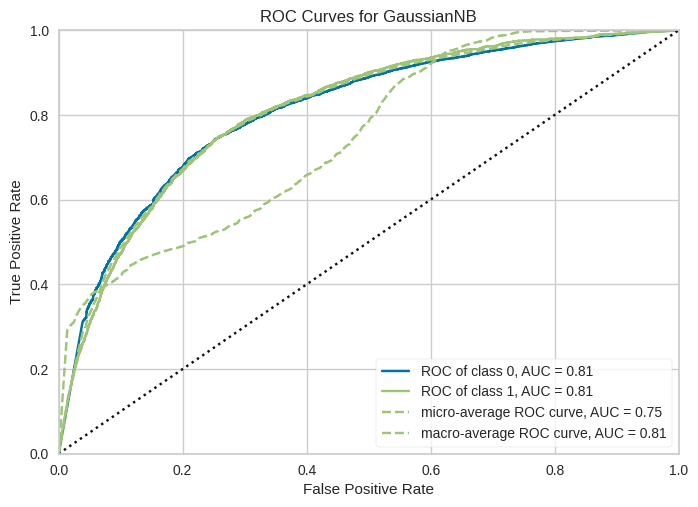

In [ ]:
plot_model(nb, plot = 'auc')

Визуально сравним границы решений градиентного бустинга и наивного байеса. У градиентоного бустинга границы перпендикулярны осям, поскольку алгоритм основан на деревьях решений. У байесовского классификатора граница решений имеет оптикаемую форму, но в целом обе модели на графиках выглядаят не очень хорошо.

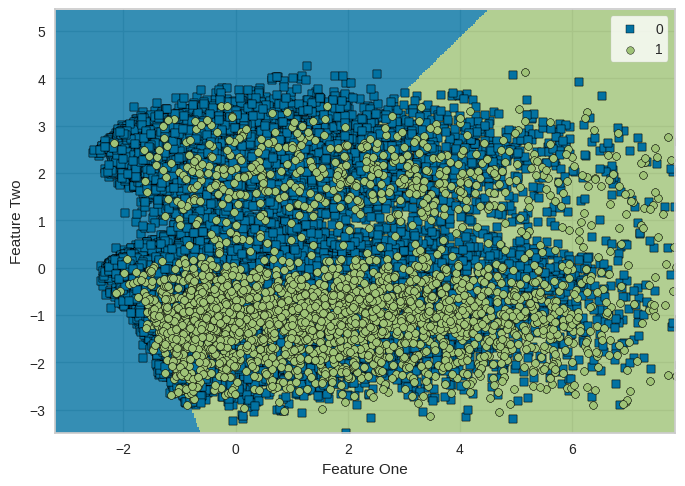

In [ ]:
plot_model(nb, plot = 'boundary')

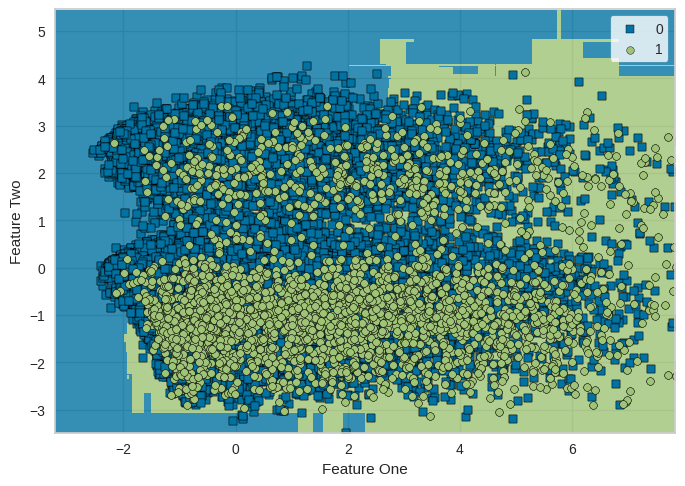

In [ ]:
plot_model(gbc, plot = 'boundary')

В классификации большое значение имеет порог решений, то с какого значения порога мы относим объект к тому или иному классу. Изменяя его мы можем менять калибровку модели, соотношение полноты и точности.

С помощью Pycaret можно посмотреть на порог, график очень понятно показывает, как разный treshold сказывается на значениях тончости и полноты.

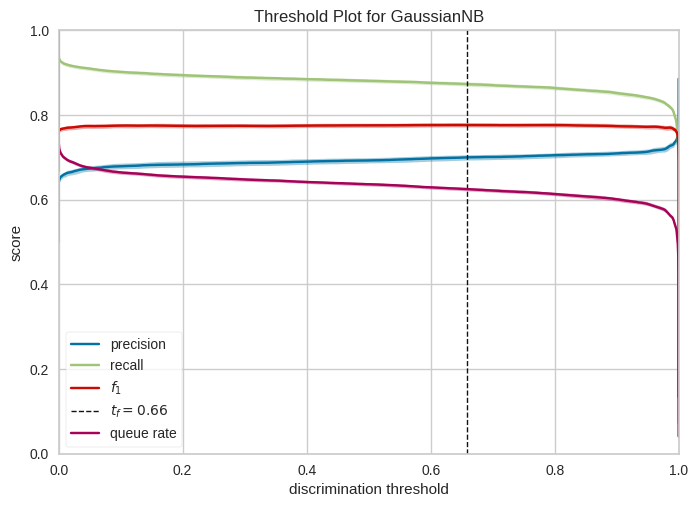

In [ ]:
plot_model(nb, plot = 'threshold')

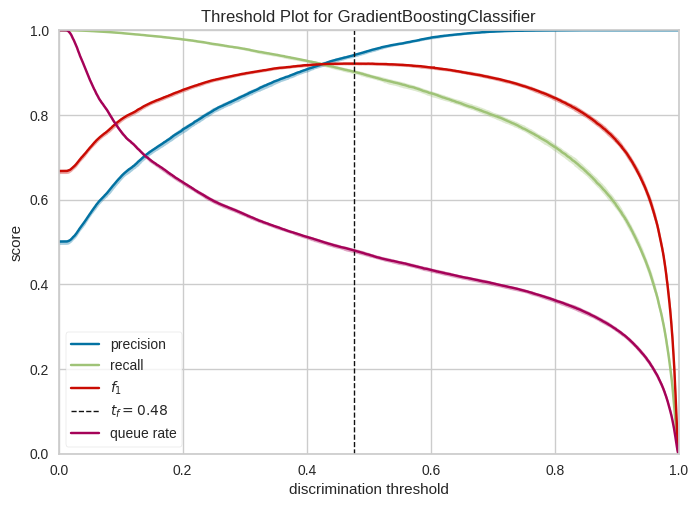

In [ ]:
plot_model(gbc, plot = 'threshold')

Сравним таблицу ошибок наивного байесовского классификатора и градиентного бустинга. У них большая разница в Precision, поэтому интересно сравнить таблицы ошибок. Видно как лишнее отнесение к 1 классу в байесовском классификаторе и наоборот недоотмечание всех элементов 1 класса  в градиентном бустинге сказывается на метриках.

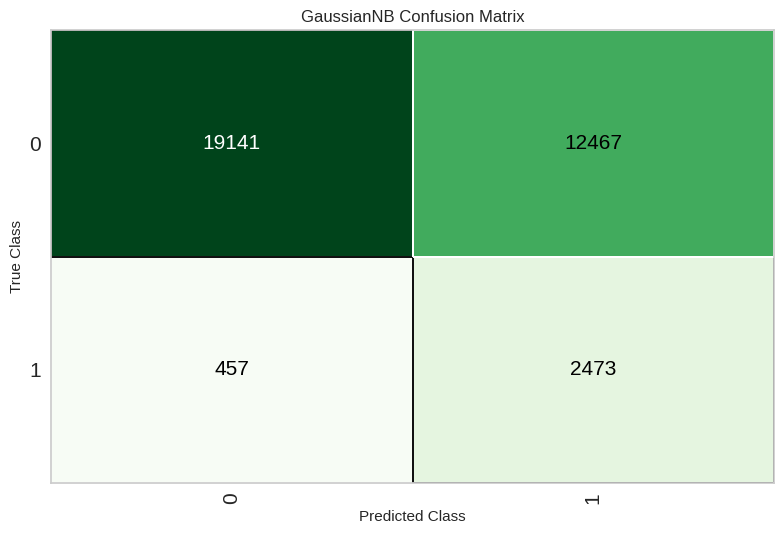

In [ ]:
plot_model(nb, plot='confusion_matrix')

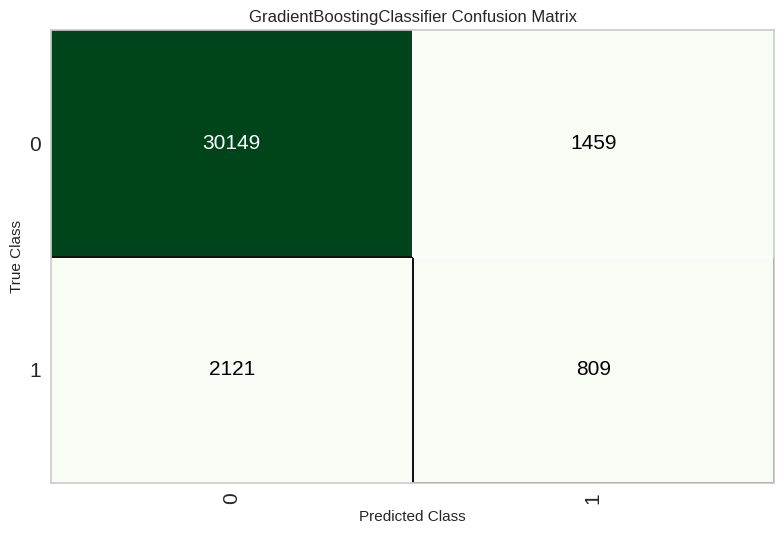

In [ ]:
plot_model(gbc, plot='confusion_matrix')

Посмотрим на важность признаков разных моделей. Интересно отметить, насколько разное распределение важности признаков у разных моделей. Поэтому объединение таких разных логик в один алгоритм может дать результаты лучше, чем одна модель.

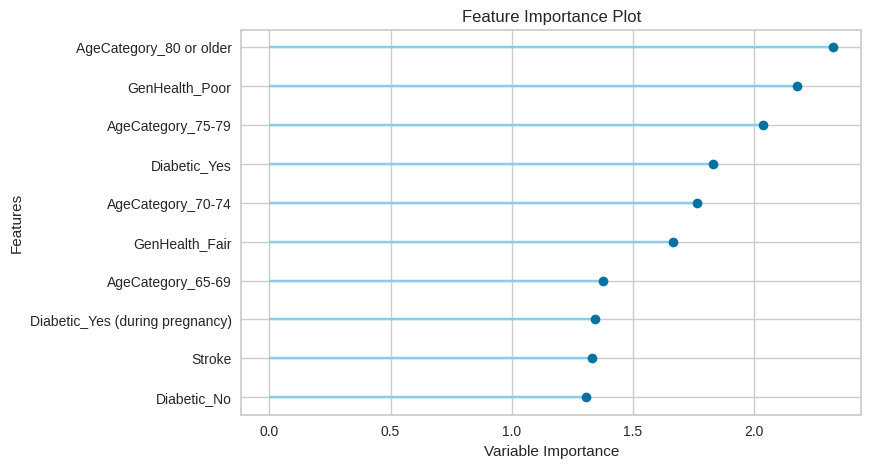

In [ ]:
plot_model(svm, plot = 'feature')

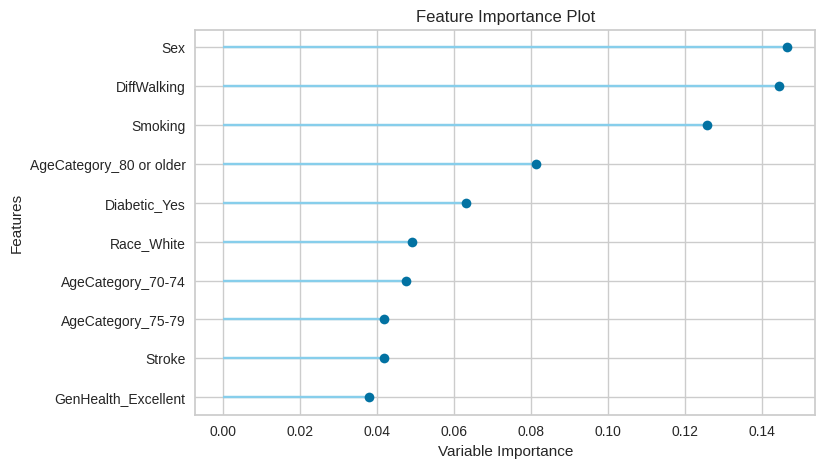

In [ ]:
plot_model(gbc, plot = 'feature')

Теперь попробуем тюнинговать лучшую модель и посмотреть на результат на новых данных.

In [ ]:
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8345,0.6337,0.2970,0.1921,0.2333,0.1453,0.1496
1,0.8383,0.6430,0.3085,0.2026,0.2446,0.1583,0.1627
2,0.8349,0.6347,0.2902,0.1902,0.2298,0.1418,0.1458
3,0.8345,0.6275,0.2772,0.1841,0.2212,0.1328,0.1363
4,0.8281,0.6427,0.3233,0.1933,0.2419,0.1519,0.1583
Mean,0.8340,0.6363,0.2993,0.1925,0.2342,0.1460,0.1506
Std,0.0033,0.0059,0.0157,0.0060,0.0084,0.0087,0.0093


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Качество стало хуже чем у первоначальной модели, поэтому продолжим работать со старой.

In [ ]:
pred_unseen = predict_model(nb, data = unseen_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6263,0.8022,0.6263,0.9043,0.7076,0.1542,0.2455


Результат на новых данных сильно изменился, точность выросла значительно, а полнота понизилась. Это настораживает, проверим метрики вручную. В датасет добавлены два новых столбца метки предсказаний и их вероятности, по столбцу меток произведем расчет.

In [ ]:
pred_unseen.head(2)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease,prediction_label,prediction_score
140718,29.049999,No,No,No,3.0,0.0,No,Female,35-39,White,No,Yes,Excellent,7.0,No,No,No,0,No,1.0
131443,27.440001,No,No,No,5.0,15.0,No,Female,18-24,White,No,Yes,Good,6.0,Yes,No,No,0,No,1.0


In [ ]:
report = classification_report(unseen_data['HeartDisease'], predict_model(nb, data = unseen_data)['prediction_label'], target_names=['Здоров', 'Болеет'])
print(report)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6263,0.8022,0.6263,0.9043,0.7076,0.1542,0.2455


              precision    recall  f1-score   support

      Здоров       0.97      0.61      0.75     11693
      Болеет       0.17      0.83      0.28      1099

    accuracy                           0.63     12792
   macro avg       0.57      0.72      0.51     12792
weighted avg       0.90      0.63      0.71     12792



Оказывается автоматически библиотека выводит средние метрики после операции предсказания, а не миноритарного класса, как после обучения моделей. Не очень очевидная вещь, по-моему.
Метрики 0,83 Recall и 0,17 Precision на новых данных по 1 классу.

Попробуем создать ансамбль моделей и посмотреть улучшит ли это результат классификации.

In [ ]:
blend = blend_models(estimator_list=[nb,svm, gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6940,0.0000,0.8288,0.1943,0.3148,0.2057,0.2959
1,0.6763,0.0000,0.8099,0.1827,0.2981,0.1853,0.2726
2,0.8039,0.0000,0.6513,0.2492,0.3605,0.2710,0.3148
3,0.7399,0.0000,0.7432,0.2092,0.3265,0.2237,0.2932
4,0.7780,0.0000,0.7052,0.2329,0.3502,0.2552,0.3125
Mean,0.7384,0.0000,0.7477,0.2137,0.3300,0.2282,0.2978
Std,0.0483,0.0000,0.0657,0.0245,0.0228,0.0314,0.0153


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
tuned_blend = tune_model(blend)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9030,0.0000,0.2868,0.4000,0.3340,0.2833,0.2878
1,0.8988,0.0000,0.2785,0.3717,0.3184,0.2650,0.2682
2,0.8989,0.0000,0.2529,0.3627,0.2980,0.2454,0.2500
3,0.8962,0.0000,0.2685,0.3529,0.3049,0.2500,0.2527
4,0.9036,0.0000,0.2663,0.3978,0.3190,0.2693,0.2756
Mean,0.9001,0.0000,0.2706,0.3770,0.3149,0.2626,0.2669
Std,0.0028,0.0000,0.0115,0.0189,0.0125,0.0137,0.0142


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Качество не улучшилось, поэтому продолжим работу с первоначальным ансамблем моделей.

In [ ]:
save_model(blend, 'blend')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['BMI', 'PhysicalHealth',
                                              'MentalHealth', 'SleepTime'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                                                                           max_features=None,
                                                                           max_leaf_nodes=None,
                     

In [ ]:
pred = predict_model(blend, data = unseen_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7989,0,0.7989,0.9024,0.8363,0.2747,0.3224


In [ ]:
report = classification_report(unseen_data['HeartDisease'], predict_model(blend, data = unseen_data)['prediction_label'], target_names=['Здоров', 'Болеет'])
print(report)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7989,0,0.7989,0.9024,0.8363,0.2747,0.3224


              precision    recall  f1-score   support

      Здоров       0.96      0.81      0.88     11693
      Болеет       0.25      0.67      0.37      1099

    accuracy                           0.80     12792
   macro avg       0.61      0.74      0.62     12792
weighted avg       0.90      0.80      0.84     12792



Снова просчитаем метрики самостоятельно. Качество ансамбля уступает моделям, обученным вручную.

Эта платформа мне показалась интуитивно понятнее и интерфейс приятнее, чем у AutoGluon, но в целом функционал аналогичный, за исключением богатой визуализации. У Pycaret получились выше метрики качества у моделей с настройками по умолчанию.

Есть и значительные минусы: я не смогла обучиться на всех данных, это занимало очень много времени и постоянно зависал Колаб, не знаю насколько это работает на реальных рабочих данных.


##Итоговое сравнение моделей

In [ ]:
table = {"Модель":   ['Baseline', "SGDClassifier", "GradientBoosting", "CatBoost", "Autogluon", "Pycaret"], "Recall": [0.30, 0.80, 0.75, 0.74, 0.12, 0.67], "Precision":
[0.22, 0.20, 0.22, 0.22, 0.51, 0.25]}
pd.DataFrame(table)

,Модель,Recall,Precision
0,Baseline,0.30,0.22
1,SGDClassifier,0.80,0.20
2,GradientBoosting,0.75,0.22
3,CatBoost,0.74,0.22
4,Autogluon,0.12,0.51
5,Pycaret,0.67,0.25


SGDClassifier и GradientBoosting показали лучшие результаты. Отмечу,что классификатор, основанный на стохастическом градиентном спуске, строился с настройками по умолчанию, поэтому, я думаю, есть потенциал для повышения качества.
Автоматизированные платформы для МО удобны, но на мой взгляд, их можно использовать для EDA, для выявления наиболее производительных алгоритмов, чем для разработки итоговых рабочих приложений. Эффект черного ящика проявляет себя в них сильнее, какие-то детали неочевидные, как например в Pycaret разные метрики после выполнения операций над одной моделью, вводят в заблуждение. Мне пришлось повозиться прежде, чем понять в чем дело. По результатам работы качество моделей из automl оказалось не лучше вручную обученных.